In [1]:
from astroquery.gaia import Gaia
from astroquery.esasky import ESASky
import numpy as np
from simbad_download import resolve_name
import pandas as pd
import pyvo as vo
import gaia_download as gd
from cross_match import add_panstarrs1, add_twomass
import matplotlib.pyplot as plt
from extinction import add_color, mag_abs

Configuration file not found:

    /home/mjablons/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


1. arcesonds

In [2]:
sources = pd.read_csv('./clustered_pyupmask.csv')

In [3]:
sources

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_i,A_z,A_y,A_J,A_H,A_K,color,color_error,mag_abs,mag_abs_error
0,28257,1636148068921376768,Gaia DR3 573351475155035008,573351475155035008,236544348,2016.0,13.267578,0.474411,84.456973,0.483350,...,0.916515,0.720285,0.587295,0.368605,0.218085,0.140709,1.603039,0.170145,8.676971,2.127860
1,28274,1636148068921376768,Gaia DR3 573352398572667392,573352398572667392,1496645516,2016.0,12.993639,0.105877,84.541275,0.101403,...,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,1.313450,0.029984,6.871222,0.464217
2,28314,1636148068921376768,Gaia DR3 573354670612121088,573354670612121088,1494711348,2016.0,12.852203,0.035797,84.583456,0.034287,...,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,0.828158,0.006719,5.087451,0.154759
3,28351,1636148068921376768,Gaia DR3 573356251160187648,573356251160187648,1580589992,2016.0,14.600912,0.043472,84.598119,0.042857,...,0.855414,0.672266,0.548142,0.344032,0.203546,0.131328,0.925355,0.008670,5.193372,0.196794
4,28407,1636148068921376768,Gaia DR3 573358072225488640,573358072225488640,1042182307,2016.0,15.209703,0.548097,84.651333,0.534833,...,1.038717,0.816323,0.665601,0.417753,0.247163,0.159470,1.646164,0.219736,8.520184,2.735473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,46811,1636148068921376768,Gaia DR3 574074438411227008,574074438411227008,1625845342,2016.0,12.816654,0.023106,85.832411,0.022673,...,1.160919,0.912361,0.743907,0.466900,0.276241,0.178231,0.810865,0.002632,3.522337,0.120212
1354,46870,1636148068921376768,Gaia DR3 574077148534800256,574077148534800256,693263320,2016.0,15.660463,0.065472,85.827157,0.066398,...,0.794313,0.624247,0.508989,0.319458,0.189007,0.121948,1.058915,0.022668,5.933452,0.335183
1355,46886,1636148068921376768,Gaia DR3 574077492132196736,574077492132196736,406142901,2016.0,15.041704,0.306579,85.866458,0.294523,...,0.794313,0.624247,0.508989,0.319458,0.189007,0.121948,1.427450,0.100781,8.432726,1.258062
1356,47085,1636148068921376768,Gaia DR3 574086670477932160,574086670477932160,1450102305,2016.0,11.476798,0.234107,85.885935,0.246116,...,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,1.595926,0.083275,8.028013,1.050452


In [4]:
sources_with_panstarrs = add_panstarrs1(sources)

INFO: Query finished. [astroquery.utils.tap.core]
panstarrs1 cross-match: 1275 sources


In [7]:
sources_with_panstarrs = add_color(sources_with_panstarrs, 'g', 'r')
sources_with_panstarrs = mag_abs(sources_with_panstarrs, 'g')

In [8]:
sources_with_panstarrs = sources_with_panstarrs[np.abs(sources_with_panstarrs['g-r'])<10]
sources_with_panstarrs = sources_with_panstarrs[np.abs(sources_with_panstarrs['g_abs'])<30]

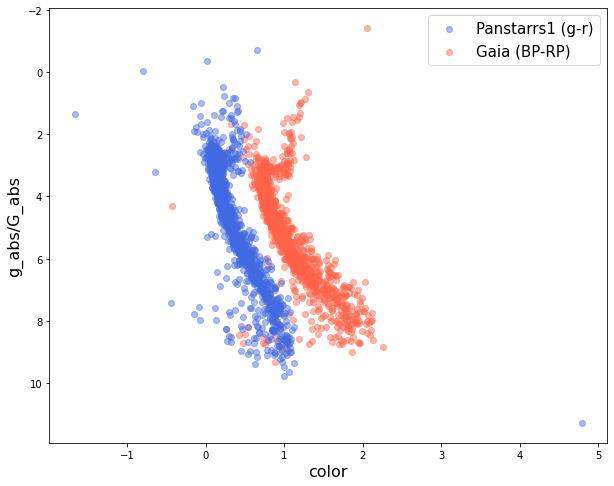

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(sources_with_panstarrs['g-r'], sources_with_panstarrs.g_abs,
            color='royalblue', label='Panstarrs1 (g-r)', alpha=.45, zorder=2)
plt.scatter(sources_with_panstarrs.color, sources_with_panstarrs.mag_abs,
            color='tomato', label='Gaia (BP-RP)', alpha=.45)
plt.gca().invert_yaxis();
plt.legend(fontsize=15);
plt.gca().set_ylabel('g_abs/G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);

In [10]:
sources_all = add_twomass(sources_with_panstarrs)

INFO: Query finished. [astroquery.utils.tap.core]
tmass_psc_xsc cross-match: 1092 sources
INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [11]:
sources_all = add_color(sources_all, 'g', 'z')

In [12]:
sources_all = mag_abs(sources_all, 'H')

In [13]:
%matplotlib notebook  

In [15]:
sources_all.head()

,H,H_error,J,J_error,K,K_error,source_id,twomass_id,g,g_error,...,r-i,r-i_error,g_abs,g_abs_error,g-r,g-r_error,g-z,g-z_error,H_abs,H_abs_error
0,NaN,NaN,NaN,NaN,NaN,NaN,573351475155035008,NaN,21.689501,0.236076,...,0.284510,0.066879,8.630933,2.140908,0.794036,0.241916,1.242015,0.242794,NaN,NaN
1,16.186001,0.237,16.705,0.143,15.810,0.267,573352398572667392,00515823+8432287,19.279100,0.006316,...,0.173414,0.017355,6.724392,0.464257,0.515860,0.013095,0.722372,0.011306,4.671001,0.521214
2,14.937000,0.092,15.341,0.056,14.821,0.112,573354670612121088,00512445+8435004,17.080999,0.004002,...,-0.025086,0.006977,4.652707,0.154809,0.193358,0.005639,0.107570,0.005689,3.548417,0.180039
3,15.102000,0.082,15.472,0.039,15.052,0.123,573356251160187648,00582412+8435530,17.479900,0.008991,...,-0.035964,0.006976,4.602746,0.196998,0.228566,0.010074,0.117155,0.009962,3.548112,0.213193
4,14.896000,0.082,15.399,0.046,14.780,0.096,573360099450875776,00570724+8446523,17.290001,0.005483,...,-0.039764,0.004299,4.183313,0.213743,0.174367,0.006550,0.051956,0.008844,3.112578,0.228867


In [16]:
from sklearn.ensemble import IsolationForest

In [17]:
color_mag_abs = sources_all[['color', 'mag_abs']]

In [18]:
clf = IsolationForest(contamination=0.25).fit_predict(color_mag_abs.values)

In [19]:
sources_all['outlier'] = clf

<IPython.core.display.Javascript object>


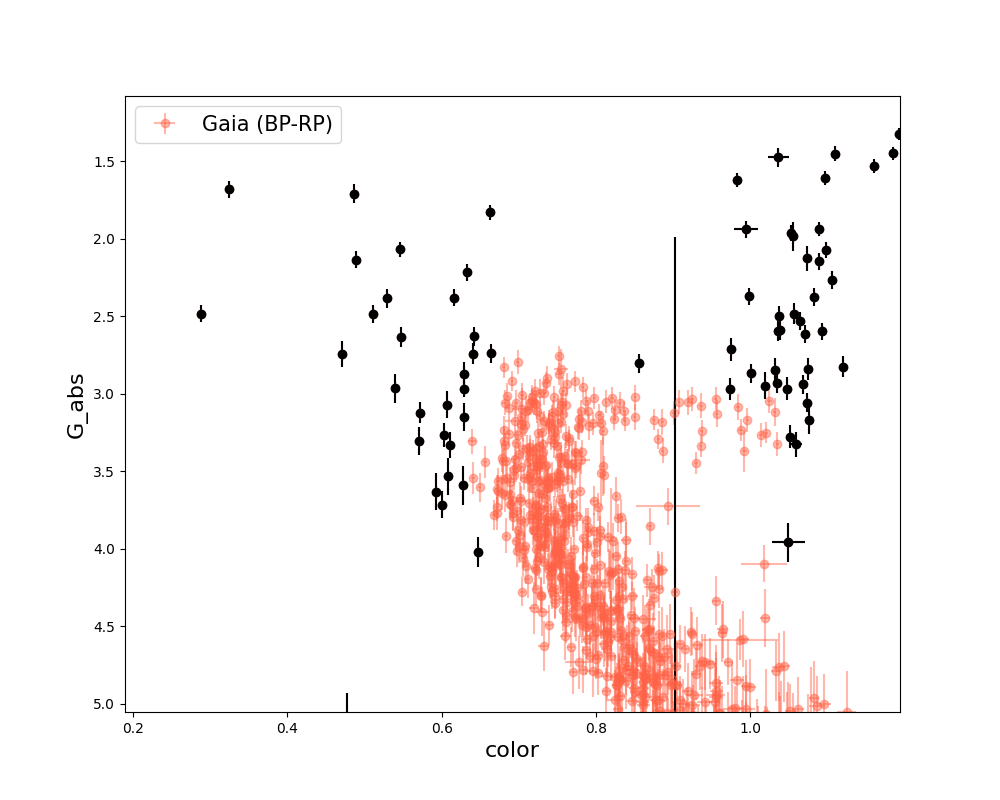

In [34]:
plt.figure(figsize=(10, 8))
# plt.scatter(sources_all['g-r'], sources_all.g_abs,
#             color='royalblue', label='Panstarrs1 (g-r)', alpha=.45, zorder=2)
plt.errorbar(sources_all.color, sources_all.mag_abs, xerr=sources_all.color_error, yerr=sources_all.mag_abs_error,
            color='tomato', label='Gaia (BP-RP)', alpha=.45, fmt='o')
plt.errorbar(sources_all[sources_all.outlier==-1].color, sources_all[sources_all.outlier==-1].mag_abs,
             xerr=sources_all[sources_all.outlier==-1].color_error,
             yerr=sources_all[sources_all.outlier==-1].mag_abs_error,
            color='black', fmt='o', zorder=2);
plt.gca().invert_yaxis();
plt.legend(fontsize=15);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);
plt.gca().set_ylim(10, -2);


In [35]:
isochrone = np.loadtxt('./cmd_test.dat', usecols=(28, 29, 30))

In [36]:
isochrone.shape

(297, 3)

In [37]:
isochrone = isochrone[isochrone[:, 1]<25]

<IPython.core.display.Javascript object>


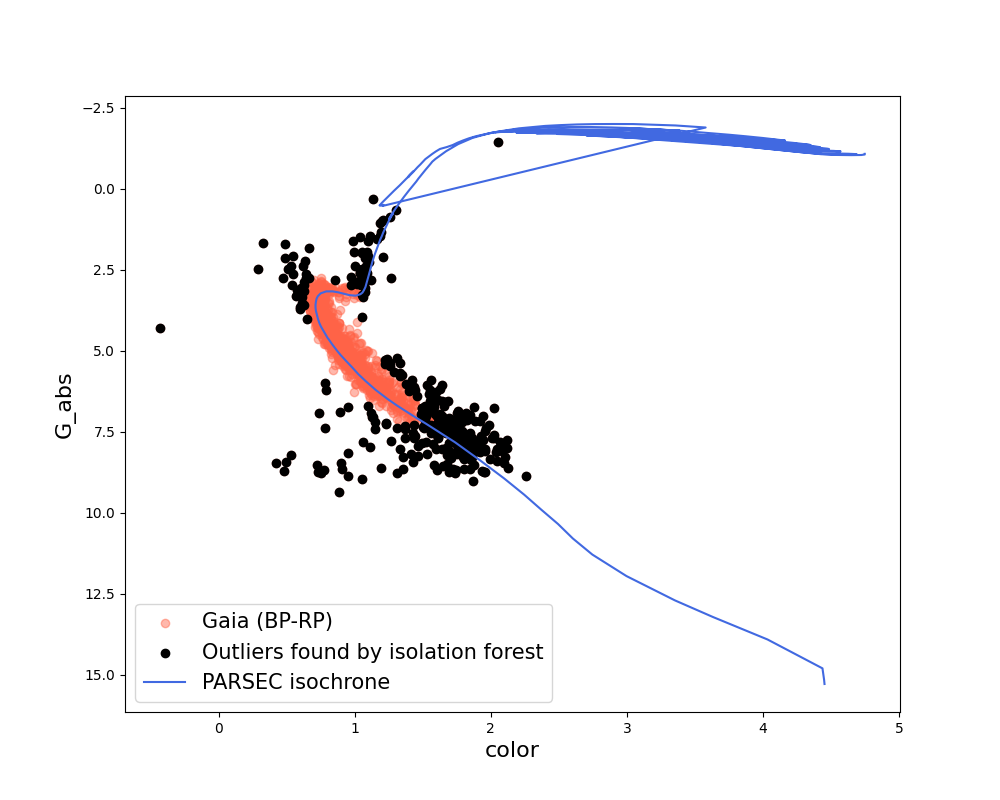

In [38]:
plt.figure(figsize=(10, 8))
# plt.scatter(sources_all['g-r'], sources_all.g_abs,
#             color='royalblue', label='Panstarrs1 (g-r)', alpha=.45, zorder=2)
plt.scatter(sources_all.color, sources_all.mag_abs,
            color='tomato', label='Gaia (BP-RP)', alpha=.45)
plt.scatter(sources_all[sources_all.outlier==-1].color, sources_all[sources_all.outlier==-1].mag_abs,
            color='black', label='Outliers found by isolation forest')
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);
plt.plot(isochrone[:, 1]-isochrone[:, 2], isochrone[:, 0], label='PARSEC isochrone', color='royalblue')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);

Constrain the isochrone to the part that interests me

<IPython.core.display.Javascript object>


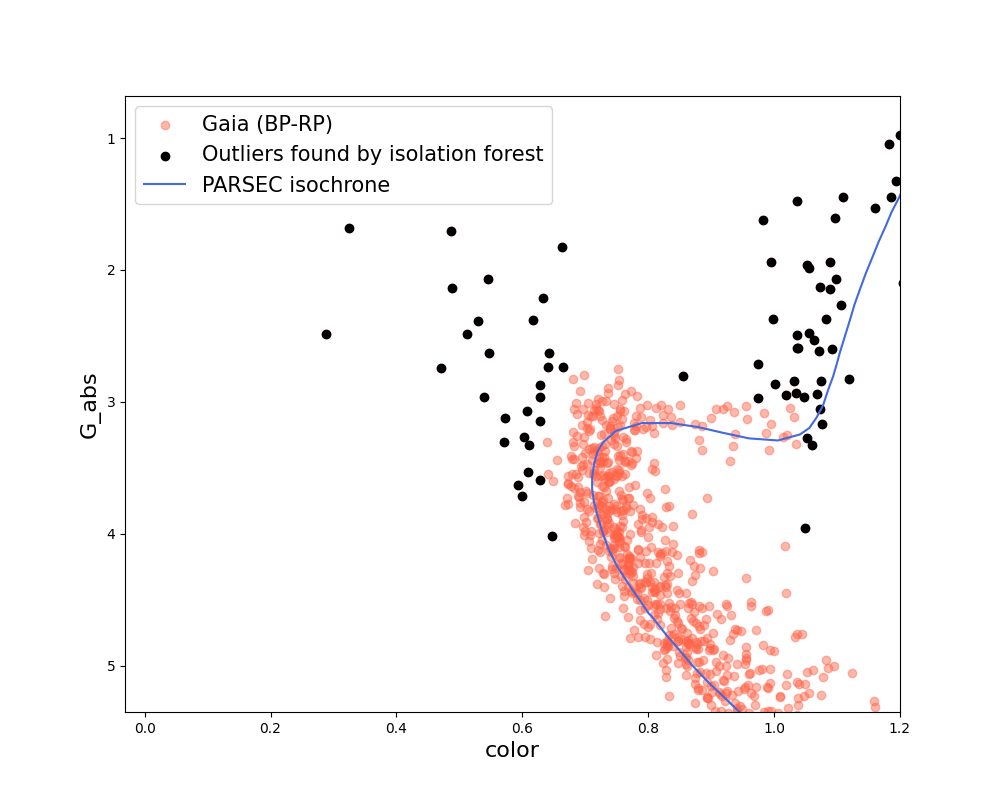

In [39]:
plt.figure(figsize=(10, 8))

isochrone_start_ind = 10
isochrone_end_ind = 100

# plt.scatter(sources_all['g-r'], sources_all.g_abs,
#             color='royalblue', label='Panstarrs1 (g-r)', alpha=.45, zorder=2)
plt.scatter(sources_all.color, sources_all.mag_abs,
            color='tomato', label='Gaia (BP-RP)', alpha=.45)
plt.scatter(sources_all[sources_all.outlier==-1].color, sources_all[sources_all.outlier==-1].mag_abs,
            color='black', label='Outliers found by isolation forest')
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);
plt.plot(isochrone[isochrone_start_ind:isochrone_end_ind, 1]-isochrone[isochrone_start_ind:isochrone_end_ind, 2],
         isochrone[isochrone_start_ind:isochrone_end_ind, 0], label='PARSEC isochrone', color='royalblue')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);

In [40]:
isochrone_cut = isochrone[isochrone_start_ind:isochrone_end_ind]
isochrone_cut = np.concatenate([
    (isochrone_cut[:, 1]-isochrone_cut[:, 2]).reshape(-1, 1),
    isochrone_cut[:, 0].reshape(-1, 1)], axis=1)

In [41]:
from scipy.interpolate import interp1d

In [42]:
BOUNDS = np.max(isochrone_cut, axis=0)-np.min(isochrone_cut, axis=0)

In [43]:
BOUNDS

array([ 1.892, 10.926])

In [44]:
def closest(source, isochrone):
    two_closest = isochrone[
    np.argsort(
            np.linalg.norm((source-isochrone), axis=1).flatten()
        )
    ][:2]
    return two_closest[0], two_closest[1]

def distance_to_closest(source, isochrone):
    src_rescaled = source/BOUNDS
    isochrone_rescaled = isochrone/BOUNDS
    p1, p2 = closest(src_rescaled, isochrone_rescaled)
    return np.linalg.norm(np.cross((p2-p1), (p1-src_rescaled)))/np.linalg.norm((p2-p1))

In [45]:
closest(np.array([0.7, 3.5]), isochrone_cut)

(array([0.714, 3.474]), array([0.711, 3.572]))

In [46]:
distance_to_closest(np.array([0.7, 3.5]), isochrone_cut)

0.006872342218776322

In [47]:
sources_all[['color', 'mag_abs']].values.shape

(1247, 2)

In [51]:
dists = np.apply_along_axis(lambda x: distance_to_closest(x, isochrone_cut), 1, sources_all[['color', 'mag_abs']].values)

<IPython.core.display.Javascript object>


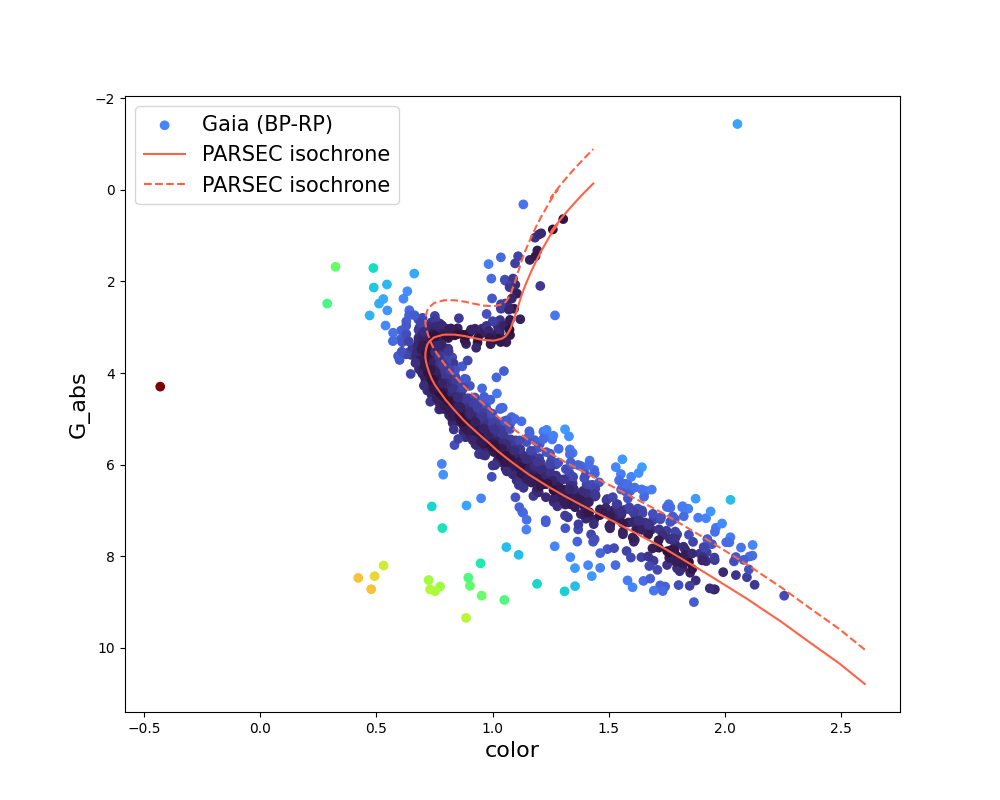

In [73]:
fig = plt.figure(figsize=(10, 8));
plt.scatter(sources_all.color, sources_all.mag_abs,
            c=dists, cmap='turbo', label='Gaia (BP-RP)')
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);
plt.plot(isochrone_cut[:, 0], isochrone_cut[:, 1], label='PARSEC isochrone', color='tomato')
plt.plot(isochrone_cut[:, 0], isochrone_cut[:, 1]-0.75, label='PARSEC isochrone', color='tomato', linestyle='--')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);

In [54]:
np.std(dists)

0.04546761547662515

<IPython.core.display.Javascript object>


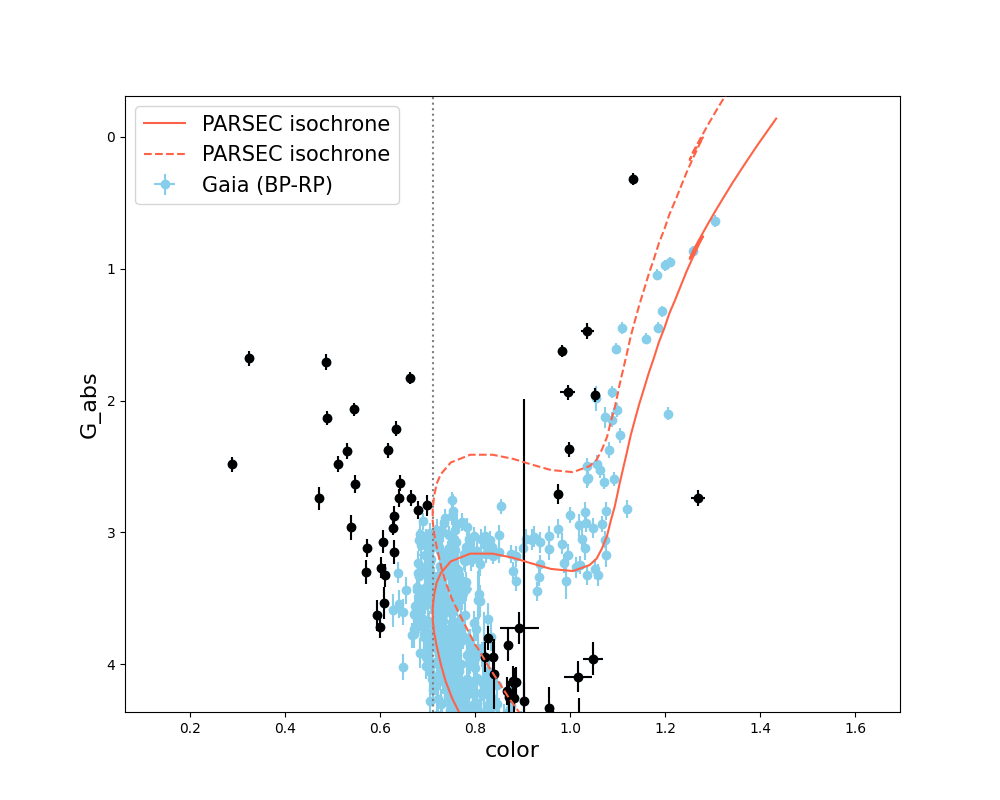

In [81]:
plt.figure(figsize=(10, 8));
plt.errorbar(sources_all.color, sources_all.mag_abs, xerr=sources_all.color_error, yerr=sources_all.mag_abs_error,
             color='skyblue', label='Gaia (BP-RP)', fmt='o', zorder=1)
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);
plt.plot(isochrone_cut[:, 0], isochrone_cut[:, 1], label='PARSEC isochrone', color='tomato', zorder=3)
plt.plot(isochrone_cut[:, 0], isochrone_cut[:, 1]-0.75, label='PARSEC isochrone', color='tomato', zorder=3, linestyle='--')
outliers = sources_all[dists>np.std(dists)]
plt.errorbar(outliers.color, outliers.mag_abs,
             xerr=outliers.color_error, yerr=outliers.mag_abs_error,
             color='black', fmt='o', zorder=2)
plt.axvline(x=np.min(isochrone_cut[:, 0]), color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);

In [77]:
np.min(isochrone_cut[:, 0])

0.7109999999999999

In [473]:
closest(np.array([0.85, 2.7]), isochrone_cut)

(array([1.1  , 2.708]), array([1.104, 2.637]))

In [65]:
bss_candidates = outliers[(outliers.color<0.75) & (outliers.mag_abs<4)]

In [116]:
yss_candidates = outliers[(outliers.color<1.09) & (outliers.color>.8) & (outliers.mag_abs<2.5)]

<IPython.core.display.Javascript object>


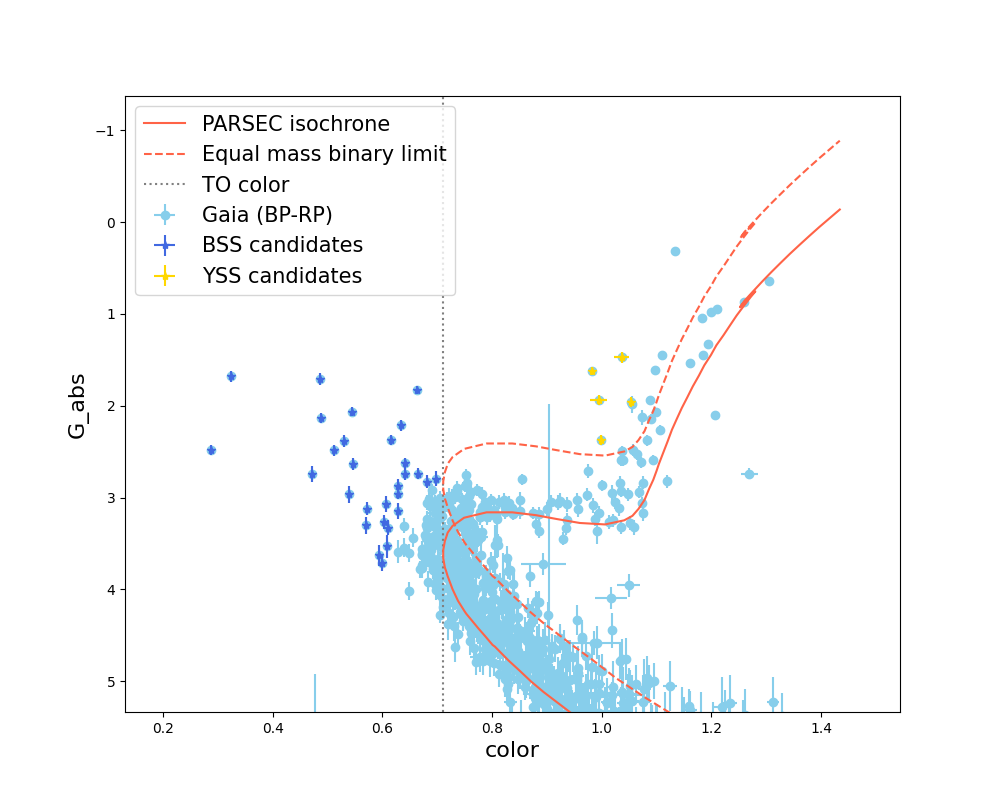

In [123]:
plt.figure(figsize=(10, 8));
plt.errorbar(sources_all.color, sources_all.mag_abs, xerr=sources_all.color_error, yerr=sources_all.mag_abs_error,
             color='skyblue', label='Gaia (BP-RP)', fmt='o', zorder=1)
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);
plt.plot(isochrone_cut[:, 0], isochrone_cut[:, 1], label='PARSEC isochrone', color='tomato', zorder=3)
plt.plot(isochrone_cut[:, 0], isochrone_cut[:, 1]-0.75, label='Equal mass binary limit', color='tomato', zorder=3, linestyle='--')
plt.errorbar(bss_candidates.color, bss_candidates.mag_abs,
             xerr=bss_candidates.color_error, yerr=bss_candidates.mag_abs_error,
             color='royalblue', fmt='*', zorder=2, label='BSS candidates')
plt.errorbar(yss_candidates.color, yss_candidates.mag_abs,
             xerr=yss_candidates.color_error, yerr=yss_candidates.mag_abs_error,
             color='gold', fmt='*', zorder=2, label='YSS candidates')
plt.axvline(x=np.min(isochrone_cut[:, 0]), color='gray', linestyle='dotted', label='TO color');
plt.gca().invert_yaxis();
plt.legend(fontsize=15);

In [118]:
len(bss_candidates)

29

In [119]:
bss_candidates.head()

,H,H_error,J,J_error,K,K_error,source_id,twomass_id,g,g_error,...,r-i_error,g_abs,g_abs_error,g-r,g-r_error,g-z,g-z_error,H_abs,H_abs_error,outlier
12,12.887,0.037,13.177,0.029,12.821,0.026,573531481529123584,00251983+8439564,14.5698,0.005174,...,0.003824,2.065755,0.060201,0.047160,0.006236,-0.162129,0.006048,1.422664,0.070473,-1
117,13.334,0.037,13.532,0.027,13.199,0.035,573620718067262848,00225119+8507492,14.6943,0.006014,...,0.003797,2.001436,0.065032,-0.039341,0.006230,-0.293430,0.006803,1.680845,0.074579,-1
145,13.068,0.035,13.331,0.025,13.043,0.030,573738468889035264,00554280+8449242,14.8112,0.007603,...,0.002400,1.956132,0.070779,-0.001034,0.007609,-0.281046,0.008439,1.536197,0.078593,-1
218,13.716,0.035,13.982,0.029,13.742,0.045,573770217287345280,01051457+8511109,15.2218,0.002257,...,0.006748,2.636390,0.087433,0.064821,0.006078,-0.131451,0.002393,1.981261,0.094151,-1
247,12.707,0.030,12.939,0.027,12.671,0.025,573777089234986240,00582688+8521098,14.2756,0.008615,...,0.005447,1.891572,0.056601,0.117653,0.008948,-0.029211,0.009333,1.079123,0.063478,-1
